# Parte 1 Infraestrutura

1- Você está rodando em Python 3.9+

2- Você está usando um ambiente virtual: Virtualenv ou Anaconda

3- Todas as bibliotecas usadas nesse exercícios estão instaladas em um ambiente virtual específico

4- Gere um arquivo de requerimentos (requirements.txt) com os pacotes necessários. É necessário se certificar que a versão do pacote está disponibilizada.

5- Tire um printscreen do ambiente que será usado rodando em sua máquina.
![Infra](conda_infra_pd.jpg)

6- Disponibilize os códigos gerados, assim como os artefatos acessórios (requirements.txt) e instruções em um repositório GIT público. (se isso não for feito, o diretório com esses arquivos deverá ser enviado compactado no moodle).

https://github.com/FTNeves80/clusterizacao/blob/main/pd..ipynb


# Parte 2 Escolha de base de dados

## Para as questões a seguir, usaremos uma base de dados e faremos a análise exploratória dos dados, antes da clusterização.

1- Baixe os dados disponibilizados na plataforma Kaggle sobre dados sócio-econômicos e de saúde que determinam o índice de desenvolvimento de um país. Esses dados estão disponibilizados através do link: https://www.kaggle.com/datasets/rohan0301/unsupervised-learning-on-country-data

2- Quantos países existem no dataset?

3- Mostre através de gráficos a faixa dinâmica das variáveis que serão usadas nas tarefas de clusterização. Analise os resultados mostrados. O que deve ser feito com os dados antes da etapa de clusterização?
Devemos fazer aplicar os seguntes passos:
3.1-Usar só as variáveis numéricas (deixe country/IDs de fora).
3.2-Tratar valores faltantes (ex.: mediana).
3.3-Padronizar as variáveis para a mesma escala (ex.: StandardScaler ou RobustScaler).
3.4- Reduzir assimetria/outliers (ex.: log1p/Yeo-Johnson ou winsorizar).

4- Realize o pré-processamento adequado dos dados.


In [32]:
#PARTE 2.1

import os
import kagglehub
import pandas as pd

# Baixa dataset e retorna o diretório local
path = kagglehub.dataset_download("rohan0301/unsupervised-learning-on-country-data")
print("Arquivos salvos em:", path)
print(os.listdir(path))

# Escolhe o CSV principal
csvs = [f for f in os.listdir(path) if f.lower().endswith(".csv")]
file = "Country-data.csv" if "Country-data.csv" in csvs else csvs[0]

# Carrega com pandas
df = pd.read_csv(os.path.join(path, file))


Arquivos salvos em: C:\Users\Dell\.cache\kagglehub\datasets\rohan0301\unsupervised-learning-on-country-data\versions\2
['Country-data.csv', 'data-dictionary.csv']


In [33]:
df.head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [34]:
print("Dimensão:", df.shape)
print("###################")
df.info()

Dimensão: (167, 10)
###################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [35]:
#PARTE 2.2 
total_paises_distintos = df['country'].nunique()

print("Total de Países distintos:", total_paises_distintos)
#Países distintos: 167

Total de Países distintos: 167


,min,25%,50%,75%,max,mean,std,range,iqr
income,609.0000,3355.000,9960.00,22800.00,125000.00,17144.688623,19278.067698,124391.0000,19445.000
gdpp,231.0000,1330.000,4660.00,14050.00,105000.00,12964.155689,18328.704809,104769.0000,12720.000
child_mort,2.6000,8.250,19.30,62.10,208.00,38.270060,40.328931,205.4000,53.850
exports,0.1090,23.800,35.00,51.35,200.00,41.108976,27.412010,199.8910,27.550
imports,0.0659,30.200,43.30,58.75,174.00,46.890215,24.209589,173.9341,28.550
inflation,-4.2100,1.810,5.39,10.75,104.00,7.781832,10.570704,108.2100,8.940
life_expec,32.1000,65.300,73.10,76.80,82.80,70.555689,8.893172,50.7000,11.500
health,1.8100,4.920,6.32,8.60,17.90,6.815689,2.746837,16.0900,3.680
total_fer,1.1500,1.795,2.41,3.88,7.49,2.947964,1.513848,6.3400,2.085


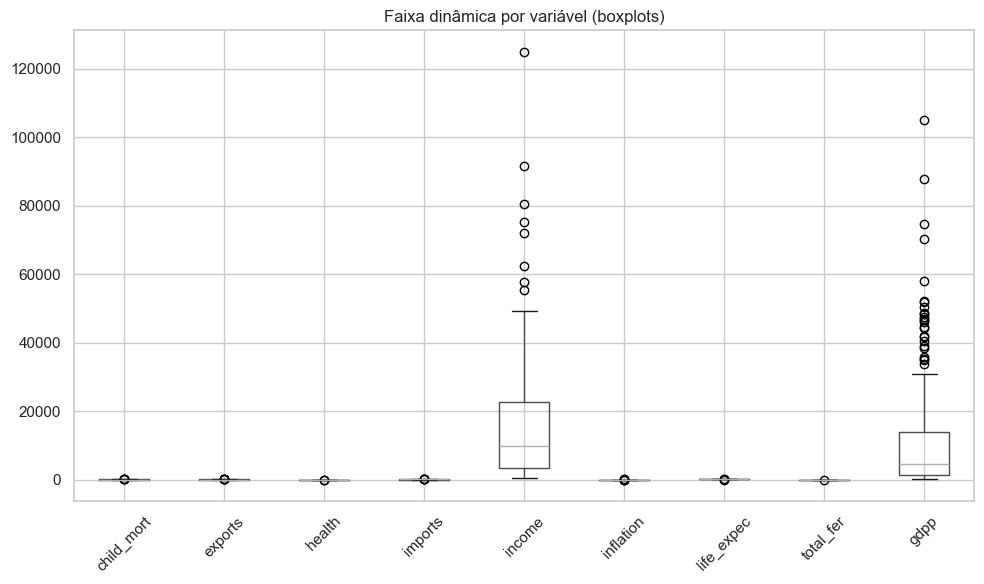

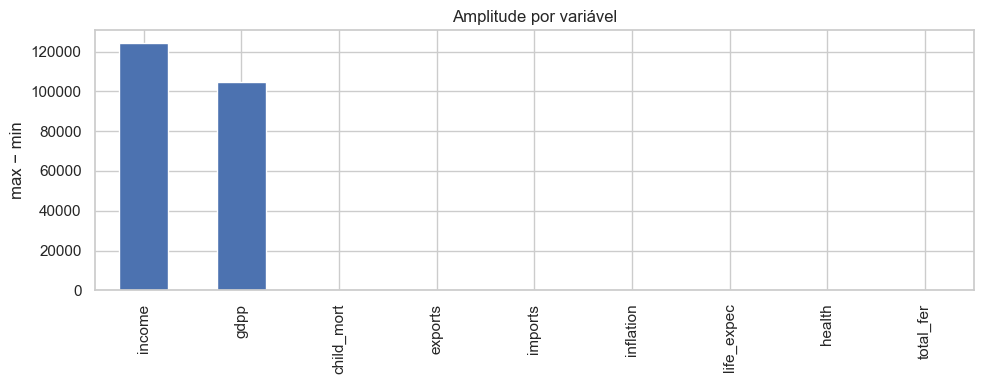

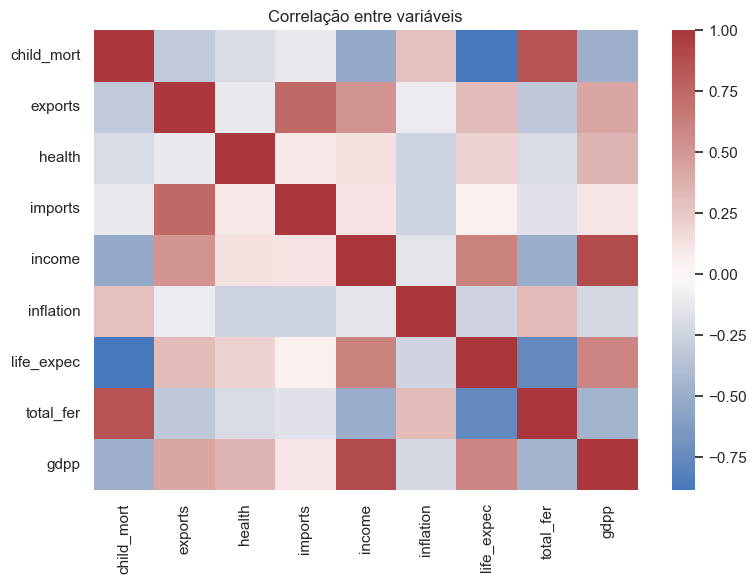

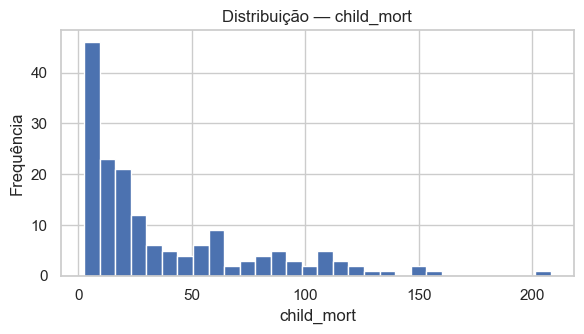

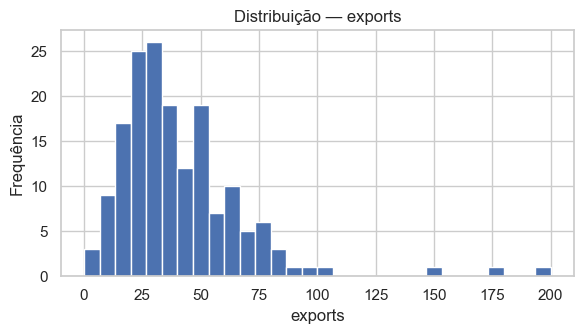

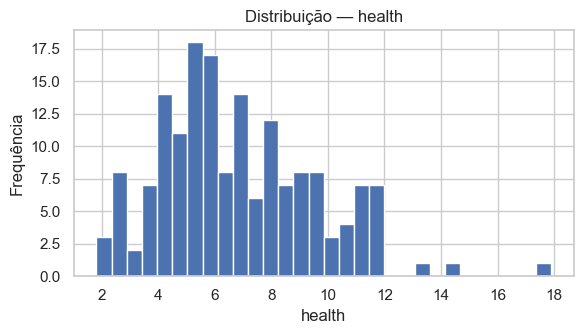

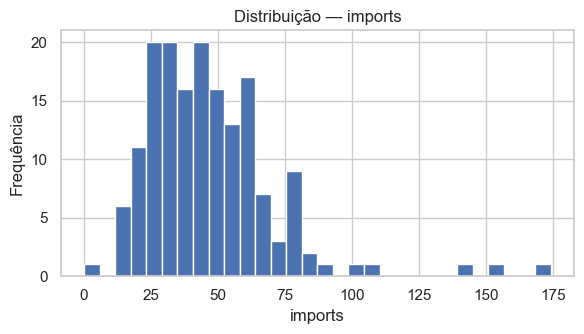

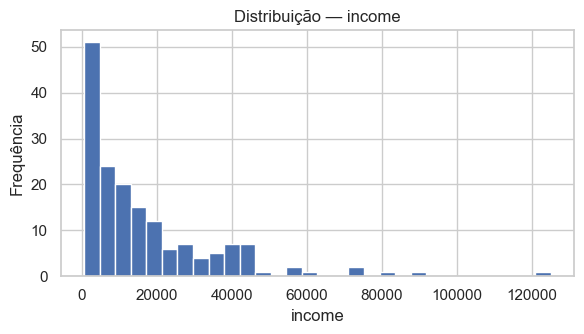

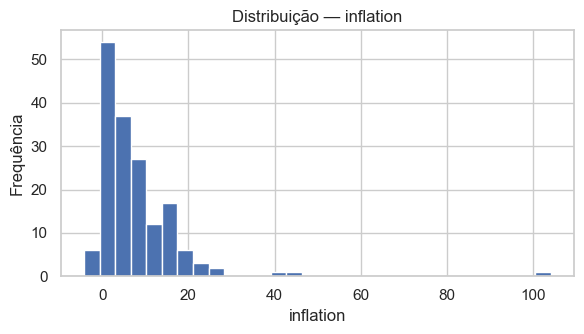

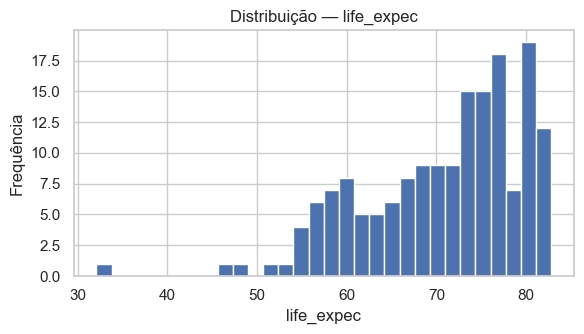

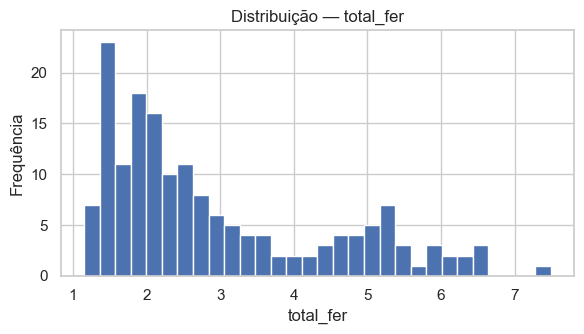

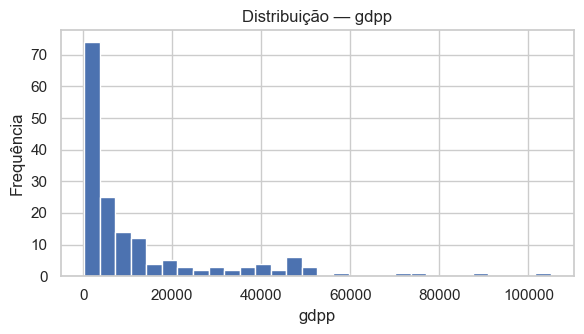

In [36]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns

#Seleciona apenas numéricas 
num_cols = df.select_dtypes(include=np.number).columns.tolist()

# Estatísticas + amplitude
stats = df[num_cols].describe().T
stats["range"] = stats["max"] - stats["min"]
stats["iqr"]   = stats["75%"] - stats["25%"]
display(stats[["min","25%","50%","75%","max","mean","std","range","iqr"]].sort_values("range", ascending=False))

# Boxplots
plt.figure(figsize=(10,6))
df[num_cols].boxplot(rot=45)
plt.title("Faixa dinâmica por variável (boxplots)")
plt.tight_layout(); plt.show()

# Amplitude (max - min)
(df[num_cols].max() - df[num_cols].min()).sort_values(ascending=False).plot(kind="bar", figsize=(10,4))
plt.title("Amplitude por variável"); plt.ylabel("max − min"); plt.tight_layout(); plt.show()


# Correlação
plt.figure(figsize=(8,6))
sns.heatmap(df[num_cols].corr(), cmap="vlag", center=0, annot=False)
plt.title("Correlação entre variáveis"); plt.tight_layout(); plt.show()

# Histogramas
for col in num_cols:
    plt.figure(figsize=(6,3.5))
    plt.hist(df[col].dropna(), bins=30)
    plt.title(f"Distribuição — {col}"); plt.xlabel(col); plt.ylabel("Frequência"); plt.tight_layout(); plt.show()



In [42]:
# PARERAS 2 
# 4- Realize o pré-processamento adequado dos dados.

from sklearn.preprocessing import StandardScaler
import pandas as pd

# 1) Selecionar apenas variáveis numéricas
num_cols = df.select_dtypes(include='number').columns
X = df[num_cols].copy()

# 2) Escalonar (padronizar) — adequado para K-Means/Hierárquica
X_ready = StandardScaler().fit_transform(X)

# 3) (Opcional) DataFrame com nomes de colunas para análises/plots
X_ready_df = pd.DataFrame(X_ready, columns=num_cols, index=df.index)

print("Dimensão dos dados pré-processados:", X_ready_df.shape)


Dimensão dos dados pré-processados: (167, 9)


In [44]:
X_ready_df.head(5)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


# Parte 3 Clusterização

## Para os dados pré-processados da etapa anterior você irá:

1.Realizar o agrupamento dos países em 3 grupos distintos. Para tal, use:
    1.1K-Médias
    1.2Clusterização Hierárquica
2.Para os resultados, do K-Médias:
    2.1Interprete cada um dos clusters obtidos citando:
        Qual a distribuição das dimensões em cada grupo
        O país, de acordo com o algoritmo, melhor representa o seu agrupamento. Justifique
3.Para os resultados da Clusterização Hierárquica, apresente o dendograma e interprete os resultados

4.Compare os dois resultados, aponte as semelhanças e diferenças e interprete.